# Primera Entrega para el Curso de Data Science 

En esta entrega se cubren las siguentes rubricas:

1. Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2. Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3. Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4. Identificar valores perdidos.

El dataset esta compuesto de una carpeta de archivos en formato CSV conteniendo informacion de usuarios de USA que realizan reservaciones en AirBnB para diferentes paises. Dicho Dataset puede descargarse de kaggle (solo despues de un muy engorroso proceso de alta de usuario) en la siguiente liga:

__https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data__

El sitio web describe el Dataset con el siguiente parrafo:

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Dataset Description'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

El dataset consta de 5 archivos en formato CSV que contienen unformacion de los usuarios y reservaciones en la plataforma AirBnb. Los archivos son los siguientes:

1. **age_gender_bkts**: contiene info. de la edad, pais, genero, ID y anyo de registro de los usuarios
2. **countries**: describe los paises destino de los diferentes usuarios, describe la ubicacion con latitud y longitud, distancia en km, descripcion del destino en km2, lenguaje del pais destino y distancia levenshtein del lenguaje
3. **sessions**: contiene informacion de sesion del usuario, userID, accion ejecutada, tipo de accion, detalle de accion, tipo de dispositivo y segundos transcurridos
4. **test_users**: dataset de 15 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro y primer browser. Se usa para probar el modelo predictivo.
5. **train_users_2**: dataset de 16 columnas con informacion de los regtistros como user ID, fecha de creacion del usuario, timestamp de actividad, fecha de la primera reserva, genero, edad, metodo de registro, flujo de registro, idioma, canal afiliado, proveedor afiliado, primer afiliado reconocido, tipo de aplicacion de registro, primer browser y pais de destino. 

El objetivo de todo el dataset es que el programador se dedique a disenyar y entrenar un modelo predictivo para lograr saber cual es el siguiente pais que visitara un usuario registrado.



## Estableciendo Hipotesis

Con la informacion del dataset podemos establecer la hipotesis o las preguntas que pudieran generar interes al usuario final de la informacion de AirBnB.

Para esta entrega podemos preguntar:

1. _Cuales son los paises destino mas populares?_
2. _Que genero agenda mas reservas en la plataforma AirBnb?_
3. _Cuales son los metodos de inicio de sesion mas comunes en la plataforma?_
4. _Cual es el metodo de inscripcion que genera mas registros de usuario? (Directo, facebook, craigslist, etc)_

Este proyecto empieza importando las librerias necesarias. Para este proyecto se emplean:

1. Pandas
2. Seaborn
3. NumPy
4. Matplotlib

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import plotly.express as px

print("Imported libraries succesfully")

Imported libraries succesfully


### Cargando el Dataset
Empezamos el analisis cargando y describiendo el dataset, me importa saber:
- Cuantas filas y cuantas columnas tiene
- Si tiene informacion faltante 
- Como se ve una entrada mala

In [4]:
#Voy importar el csv como un dataframe de pandas e imprimir las columnas que tiene

df = pd.read_csv("train_users_2.csv")
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
df.shape

(213451, 16)

Podemos observar que el dataset se cargo correctamente y desde el vamos, las columnas 'date_first_booking', y 'age' contienen datos NaN.

El csv 'train_users_2' esta compuesto de 213,451 filas con 16 columnas, mas que suficiente para poder trabajar diferentes indicadores.

## Limpiando el Dataset

En este apartado voy a decidir como tratar los datos faltantes: 
- Los datos -Unknown- en la columna [gender] se van a tratar como 'OTHER'
- Se respetan los valores NaN para evitar sesgos en valores numericos

In [6]:
df.replace(to_replace="-unknown-", value= np.nan, inplace=True)
df['gender'].fillna('OTHER', inplace=True)
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\386272635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('OTHER', inplace=True)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,OTHER,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,OTHER,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### I. Cuales son los paises mas populares para agendar?

En esta seccion hago una grafica usando la libreria Matplotlib para responder a la pregunta. Decido emplear un grafico de pastel para indicar de manera mas visual la respuesta.

([<matplotlib.patches.Wedge at 0x1b261bc1670>,
 [Text(-0.28516881031316427, 1.0623929356055484, 'NDF'),
  Text(-0.1407003571464063, -1.0909644400707448, 'US'),
  Text(0.887248563705739, -0.6502230280466108, 'other'),
  Text(1.0088578473704368, -0.43841286910752153, 'FR'),
  Text(1.0527097009714854, -0.3190647042223973, 'IT'),
  Text(1.0738799998904744, -0.2382892062919235, 'GB'),
  Text(1.0874746913951812, -0.16552581543359188, 'ES'),
  Text(1.094836206492849, -0.10645976212798881, 'CA'),
  Text(1.0980007573770938, -0.06628979408120586, 'DE'),
  Text(1.099383965745729, -0.03680891007886567, 'NL'),
  Text(1.0998872073816126, -0.01575217566806191, 'AU'),
  Text(1.0999943899208344, -0.0035131385812831387, 'PT')])

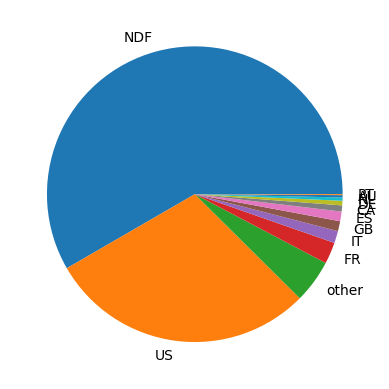

In [7]:
country_dist = df['country_destination'].value_counts().reset_index()
country_dist.columns = ['country_destination', 'count']
country_dist.head(10)
fig, destiny = plt.subplots()
destiny.pie(country_dist['count'], labels = country_dist['country_destination'])

Como se aprecia en la grafica, el valor NDF predomina y como tenemos entendido que NDF no define ningun pais en especifico, vamos a generar la grafica denuevo para poder visualizar los otros paises de una manera mas limpia:

In [8]:
#Primero 
country_dist.replace(to_replace="NDF", value= np.nan, inplace=True)
country_dist.dropna(inplace =True) #El argumento inlpace sustituye el dataframe anterior por el actualizado, ya NO tiene NAN
country_dist.head(10)
country_dist.shape

(11, 2)

([<matplotlib.patches.Wedge at 0x1b261c013a0>,
 [Text(-0.8867001157606361, -0.6509707402872073, 'US'),
  Text(1.0984880127007794, 0.057654886633248636, 'other'),
  Text(0.9161092869001035, 0.6088873249258716, 'FR'),
  Text(0.7141180056877862, 0.8366812260069538, 'IT'),
  Text(0.5506058647890062, 0.9522778909855835, 'GB'),
  Text(0.425699779931384, 1.1219535183626688, 'ES'),
  Text(0.29981066402380446, 1.2649559540701827, 'CA'),
  Text(0.20196923316757942, 1.3853549829750136, 'DE'),
  Text(0.12842585532948197, 1.5948375464864413, 'NL'),
  Text(0.06531169045960336, 1.8988771374392048, 'AU'),
  Text(0.016102316460053334, 2.099938264665088, 'PT')],
 [Text(-0.4836546085967105, -0.35507494924756755, '70.2%'),
  Text(0.5991752796549705, 0.03144811998177198, '11.4%'),
  Text(0.4996959746727837, 0.3321203590504754, '5.6%'),
  Text(0.38951891219333784, 0.45637157782197474, '3.2%'),
  Text(0.3003304717030943, 0.5194243041739546, '2.6%'),
  Text(0.2483248716266407, 0.6544728857115567, '2.5%'),
  T

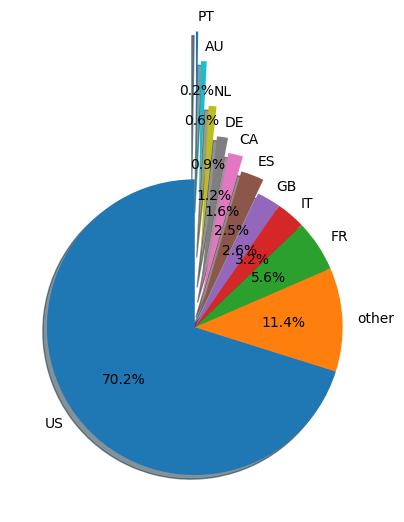

In [9]:
#Genero la grafica una vez mas
#Se usa una vista explosionada para facilitar la lectura de las labels
fig, destiny = plt.subplots()
destiny.pie(country_dist['count'], explode = (0,0,0,0,0,0.1,0.2,0.3,0.5,0.8,1), labels = country_dist['country_destination'],autopct='%1.1f%%', shadow=True, startangle=90)


### Respuesta

Los primeros 3 paises mas populares para visitar con una reserva de AirBnB son:

1. EEUU
2. Resto del Mundo  
3. Francia

### II. Que Genero crea mas reservas en AirBnB?

En esta seccion toca graficar cuantas reservas se hacen por genero.
Para esta respuesta quiero usar un grafico de barras para facilidad de lectura por numeros. Para generar esta grafica quiero usar Seaborn.

In [10]:
#Primeramente debo generar el dataframe que quiero graficar. Debe estar compuesto de Pais de Origen y compararse con # de Ordenes
#Puedo usar la columna [Gender] como el eje de las X
#Puedo usar el conteo de [Gender] como el eje de las Y

gen_con = df['gender'].value_counts().reset_index()
gen_con.columns = ['gender', 'count']
gen_con.head()

,gender,count
0,OTHER,95970
1,FEMALE,63041
2,MALE,54440


<Axes: xlabel='gender', ylabel='count'>

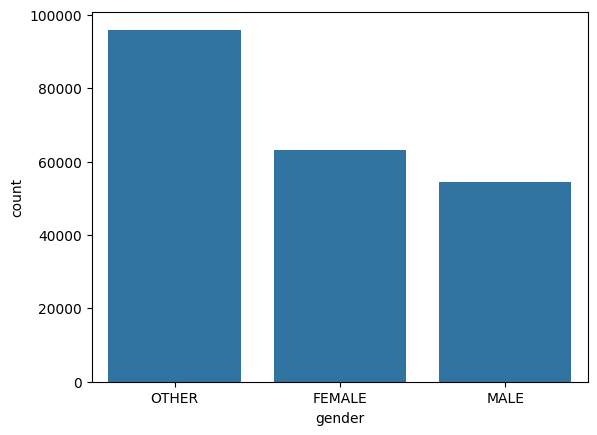

In [11]:
#Generando la grafica de barras con Seaborn

sns.barplot(gen_con, x='gender', y='count')

Segun las graficas Other genera mas ordenes que los otros generos.
Podria ser que la etiqueta -Other- esta sesgando el resultado, pues es posible que el campo de "Genero" haya quedado sin llenar en el campo de registro.
En este caso, se vuelve a plantear la Limpieza del Dataset.

In [12]:
dc = pd.read_csv("train_users_2.csv")
dc.replace(to_replace="-unknown-", value= np.nan, inplace=True)
dc.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [13]:
#Podemos generar la tabla de interes de genero con la limpieza corregida
gen_c = dc['gender'].value_counts().reset_index()
gen_c.columns = ['gender', 'count']
gen_c.head()
#Se puede apreciar que las personas de genero no binario son menos cuando eliminas los datos vacios


,gender,count
0,FEMALE,63041
1,MALE,54440
2,OTHER,282


<Axes: xlabel='gender', ylabel='count'>

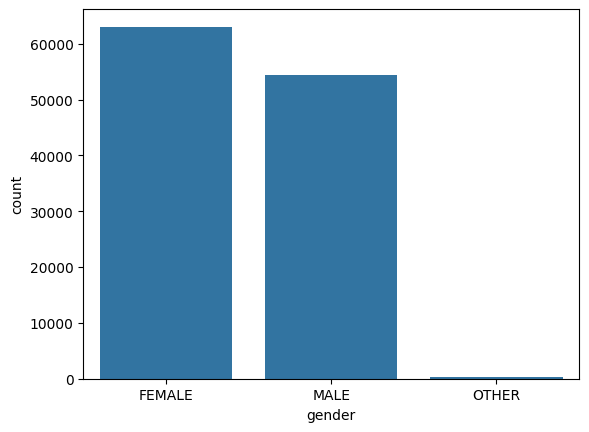

In [14]:
# Finalmente generamos la grafica sin sesgo
sns.barplot(gen_c, x='gender', y='count')

### Respuesta

Las mujeres crean mas reservaciones por AirBnb que los hombres y las personas de Otro genero.

### III. Cual es la jerarquia entre dispositivos de inicio de sesion?

Para responder a esta pregunta tengo que generar una grafica llamada Sunburst. Es como un grafico de pastel con pasos extra.

Para el estudio, tengo que crear una columna de "conteo" y posteriormente, crear mi grafico:

In [15]:
# Creando una columna de conteo
df['count'] = 1

# Crear grafico sunburst con el conteo
fig = px.sunburst(df, path=['signup_method', 'first_device_type'], values='count',
                  title='Signup Method and Device Type Hierarchical Distribution',
                  height=600, width=600)

fig.show()

### Respuesta

A simple vista, el modo basico para iniciar sesion es mas popular que iniciar sesion con 'facebook'.
Y lo metodos mas comunes para iniciar sesion es en dispositivos de Windows Desktop y Mac Desktop.

### IV. Cual es el canal que mas registros ha generado?

Para generar la grafica del canal que trae mas registros, tenemos que crear un conteo empleando la columna "first_affiliate_tracked". Este analisis se realiza para determinar que tanto funcionan las campanyas de publicidad en diferentes medios.

Para generar la grafica del canal que trae mas registros, tenemos que crear un conteo empleando la columna "first_affiliate_tracked"

In [16]:
channel_con = df['first_affiliate_tracked'].value_counts().reset_index()
channel_con.columns = ['first_affiliate_tracked', 'count']
channel_con.head()

,first_affiliate_tracked,count
0,untracked,109232
1,linked,46287
2,omg,43982
3,tracked-other,6156
4,product,1556


Para este grafico voy a usar la Plot Bar que proporciona Pandas:

<Axes: xlabel='first_affiliate_tracked'>

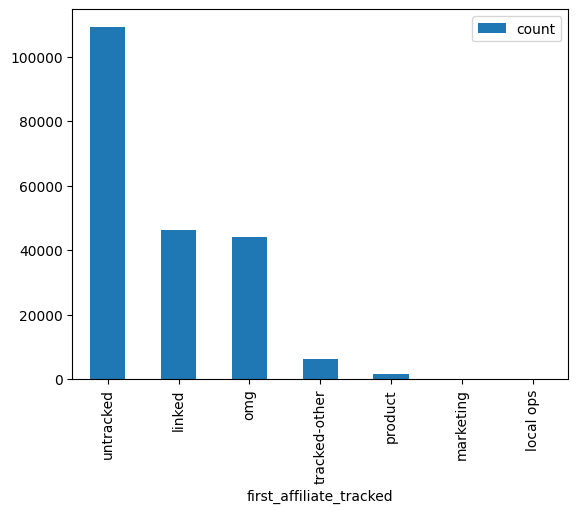

In [17]:
channel_con.plot.bar(x='first_affiliate_tracked', y='count')

### Respuesta 
En este grafico se puede observar que la mayoria de los registros fueron llenados sin considerar la pregunta del canal por el cual el usuario ha escuchado de la aplicacion. 

Fuera de 'Untracked', la opcion de Enlazado o Linked es el segundo canal mas popular de llegar a registrarse en AirBnB

# Conclusiones

En esta entrega se establecen 4 preguntas a responder:

1. _Cuales son los paises destino mas populares?_
2. _Que genero agenda mas reservas en la plataforma AirBnb?_
3. _Cuales son los metodos de inicio de sesion mas comunes en la plataforma?_
4. _Cual es el metodo de inscripcion que genera mas registros de usuario? (Directo, facebook, craigslist, etc)_

Para las cuales se crean graficos faciles de leer e interpretar para ofrecer una respuesta rapida y detallada al usuario/interesado. 

Para las graficas se emplean librerias de Python para procesamiento de datos como Seaborn, Matplotlib, Pandas y tambien se utilizan algunos metodos de Numpy.

Cabe mencionar que el Analisis Exploratorio de Datos revela que algunas columnas fueron mal interpretadas por el usuario, o se llenaron mal, o tuvieron un error de procesamiento al momento de pasar por el mecanismo de mineria de datos, por lo cual no pueden ser confiables para un analisis mas profundo.